In [1]:
import yfinance as yf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Pull VIX historical data
ticker = "^VIX"

vix_history = yf.download(ticker, start='2018-01-01',progress=False)
vix_history = vix_history.asfreq(freq='D').ffill().dropna()
vix_history.to_csv('resources/vix.csv')
vix_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-24,30.650000,30.950001,29.780001,29.850000,29.850000,0.0
2022-10-25,29.799999,30.000000,28.219999,28.459999,28.459999,0.0
2022-10-26,28.440001,28.520000,27.270000,27.280001,27.280001,0.0
2022-10-27,27.510000,27.670000,26.940001,27.389999,27.389999,0.0
2022-10-28,27.430000,27.590000,25.750000,25.750000,25.750000,0.0


In [3]:
# Pull S&P 500 historical data
ticker = "^GSPC" 

sp_history = yf.download(ticker, start='2018-01-01',progress=False)
sp_history = sp_history.asfreq(freq='D').ffill().dropna()
sp_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-24,3762.010010,3810.739990,3741.649902,3797.340088,3797.340088,4.747930e+09
2022-10-25,3799.439941,3862.850098,3799.439941,3859.110107,3859.110107,4.843120e+09
2022-10-26,3825.969971,3886.149902,3824.070068,3830.600098,3830.600098,4.817310e+09
2022-10-27,3834.689941,3859.949951,3803.790039,3807.300049,3807.300049,4.687320e+09
2022-10-28,3808.260010,3905.419922,3808.260010,3901.060059,3901.060059,4.459410e+09


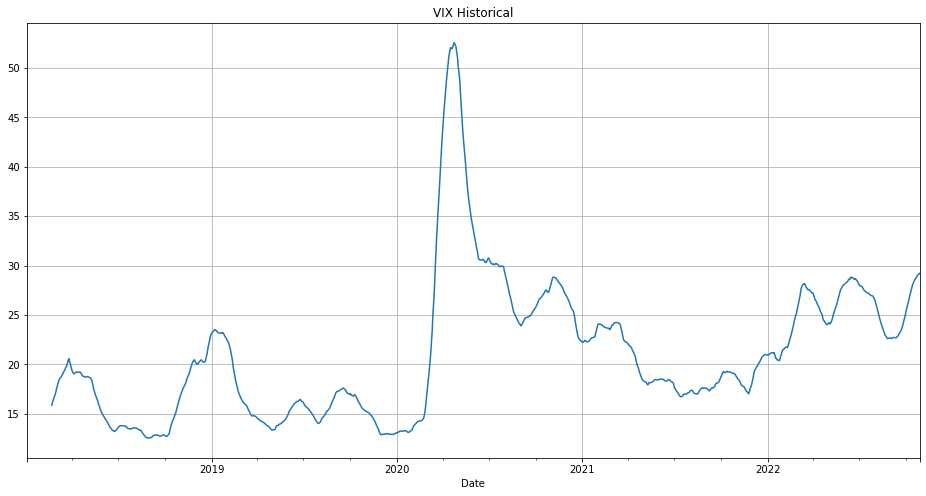

In [4]:
#Plot VIX 50-day rolling average
vix_plot = vix_history['Adj Close'].rolling(window=50).mean().plot(figsize=(16,8), title='VIX Historical', grid=True)

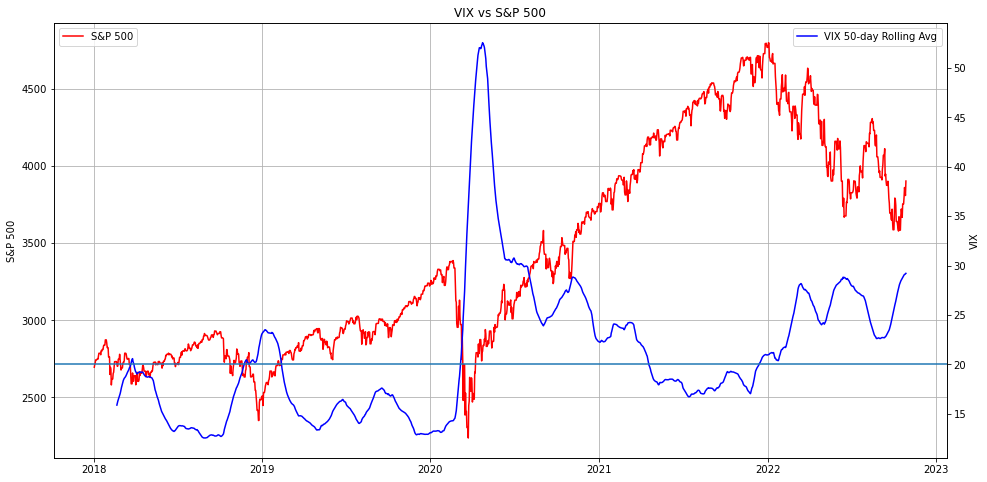

In [6]:
# Compare VIX to S&P Index and locate points where VIX crosses y value of 20 (arbitrarily selected) which is seen as fearful market
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(sp_history['Adj Close'], label ='S&P 500', color='r')
ax.set_ylabel('S&P 500')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(vix_history['Adj Close'].rolling(window=50).mean(), label='VIX 50-day Rolling Avg', color='b')
ax2.set_title('VIX vs S&P 500')
ax2.set_ylabel('VIX')
ax2.legend(loc='upper right')
ax2.axhline(y=20)